In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
data = pd.read_csv("/workspaces/linear-regression/data/processed/datos-procesados.csv")
data.head()

,age,bmi,children,charges_log,smoker_num
0,0.021739,0.381409,0.0,9.734176,0
1,0.000000,0.568919,0.2,7.453302,1
2,0.217391,0.544322,0.6,8.400538,1
3,0.326087,0.215461,0.0,9.998092,1
4,0.304348,0.412714,0.0,8.260197,1


In [8]:
X = data.drop(['charges_log'], axis=1)
y = data['charges_log']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

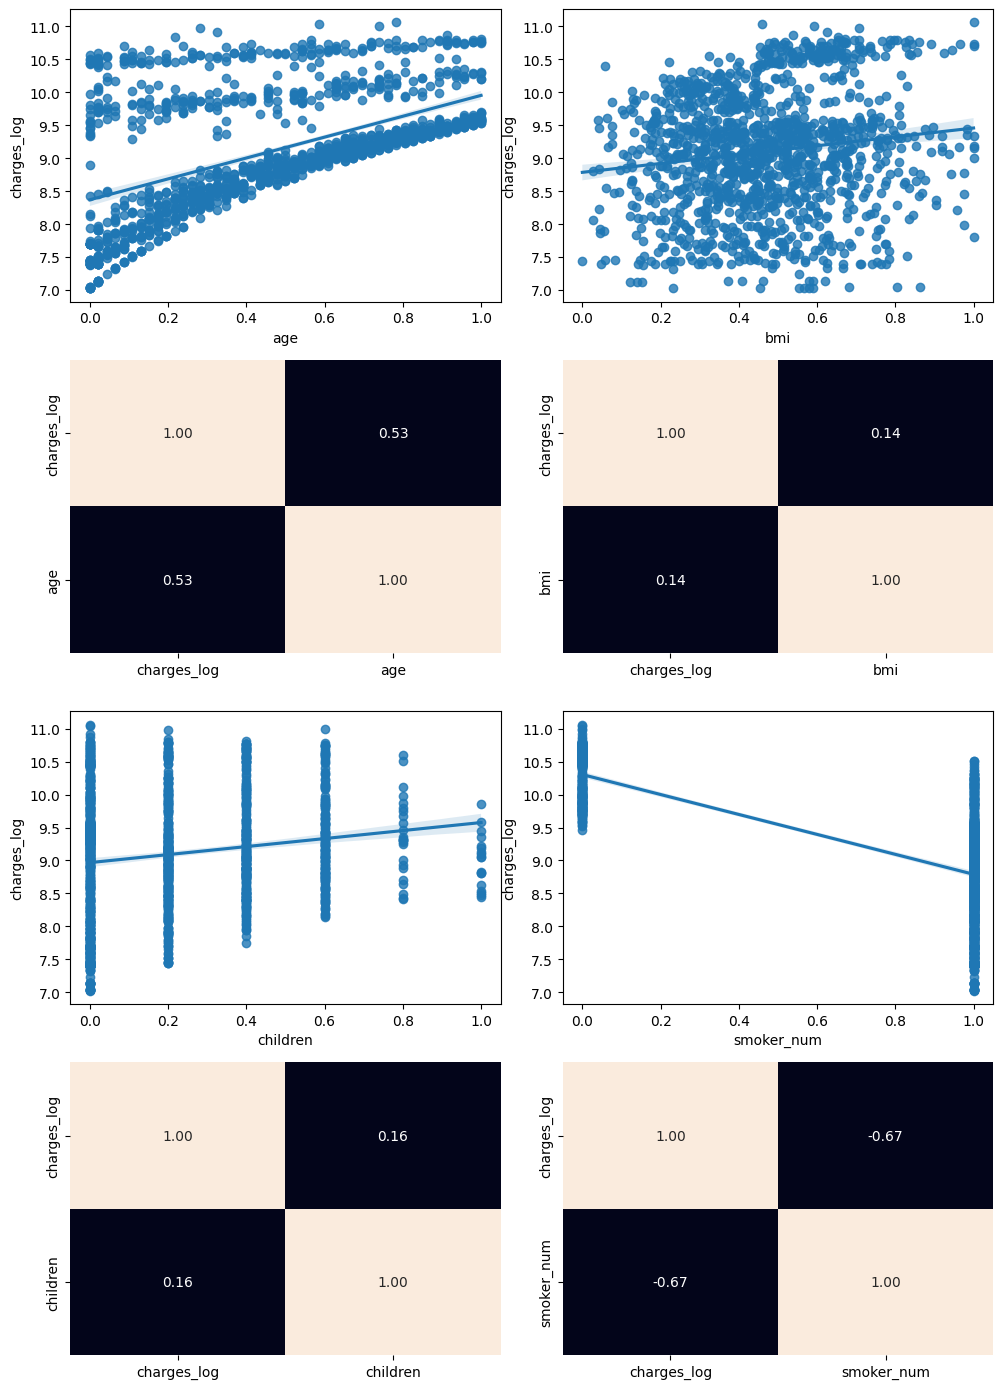

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14))

sns.regplot(data = data, x = "age", y = "charges_log", ax = axis[0, 0])
sns.heatmap(data[["charges_log", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = data, x = "bmi", y = "charges_log", ax = axis[0, 1])
sns.heatmap(data[["charges_log", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = data, x = "children", y = "charges_log", ax = axis[2, 0])
sns.heatmap(data[["charges_log", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = data, x = "smoker_num", y = "charges_log", ax = axis[2, 1])
sns.heatmap(data[["charges_log", "smoker_num"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 9.295395760745205
Coefficients (b1, b2): [ 1.61372229  0.31450152  0.53528862 -1.52380163]


La intercepción (a) representa el valor predicho de la variable objetivo cuando todas las características de entrada son cero.

Los coeficientes (b1, b2, ...) indican cuánto cambia la variable objetivo cuando una característica específica aumenta en una unidad, manteniendo todas las demás características constantes. Por ejemplo, si aumentas la primera característica de entrada en una unidad, el valor predicho de la variable objetivo aumentaría en aproximadamente 1.6137 unidades, y así sucesivamente

In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 7.87252898,  8.68256212,  8.83395348, 10.25777543,  8.66710154,
        9.28971729,  9.89297607,  7.99570451,  8.95338734, 10.67509081,
        9.33161152, 10.6026756 ,  8.01130044,  9.47740341,  8.80446154,
        9.06088512,  8.12000378, 10.22720214,  8.62740636,  8.40147395,
        8.01294606,  8.67013455,  9.341657  , 10.26312496, 10.52192147,
        8.26847164,  8.48698884,  8.18848932,  9.11504751,  9.44981441,
        8.37939645,  8.87781294,  9.55169271,  9.43290462, 10.87281038,
        8.31309661,  8.46894975, 10.12748488,  8.87292842,  8.98237817,
        8.15147342,  9.56177379, 10.69461972,  8.40565567,  9.00806032,
        8.22125957,  8.89753616,  9.3504414 ,  8.32967356,  9.05375805,
        8.50770886,  8.7764812 ,  9.48312984,  8.01626136,  9.41104671,
        9.04579647,  8.08093589,  8.19007222,  9.92958304,  8.93954907,
        9.54361635,  8.87359423,  9.33689204,  8.00949375, 10.47433944,
        8.96268806,  8.79214812,  9.10550346,  9.44842103,  9.63

In [13]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.17209186286008696
R2 Score: 0.8006159742126172


El MSE (Mean Squared Error) es aproximadamente 0.1721. Este valor representa el promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos.

El R2 Score es aproximadamente 0.8006. Este valor representa la proporción de la varianza de la variable objetivo que es explicada por el modelo. Un R2 Score más cercano a 1 indica un mejor ajuste del modelo a los datos, donde 1 significa un ajuste perfecto y 0 significa que el modelo no explica nada de la variabilidad de los datos. En este caso, un valor de 0.8006 sugiere que el modelo explica aproximadamente el 80.06% de la variabilidad de los datos, lo cual es bastante bueno.